# Lesson 5. Optimizations in CNNs

## 5.1. Concepts

### 5.1.1. Data normalization

Neural networks work better with data that has been normalized. This can be achieved by normalizing the data before fitting it or simply adding the keras **BatchNormalization layer**. This layer normalizes the input which a very clean solution because you don't have to worry that the data has to be normalized not only in the training process but when inferring. For more info check the [documentation](https://keras.io/api/layers/normalization_layers/batch_normalization/).

Having the mean close to 0 means that there will be positive and negative values so there will be some activation functions we can't use. One of these is the Sigmoid function:

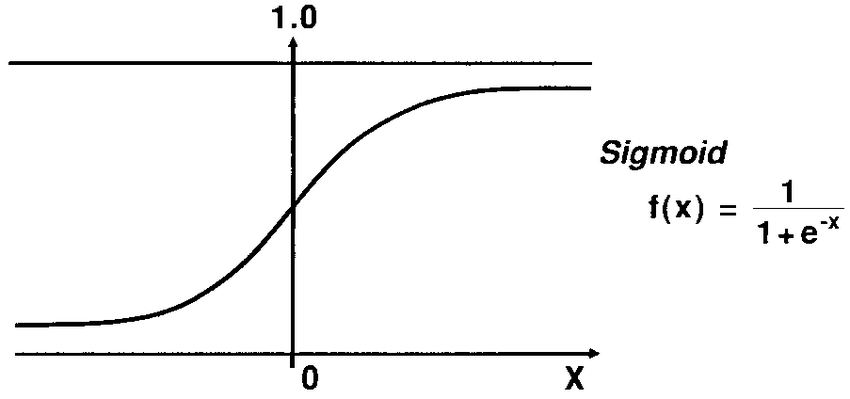

We will have to use functions like the tahn, that accepts negative values:

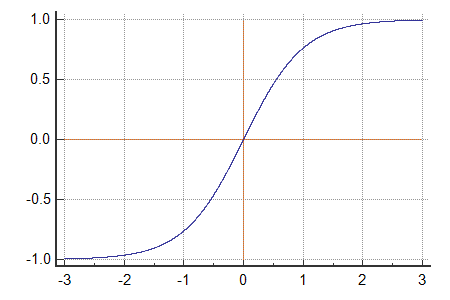

### 5.1.2. Shuffle the data

Many times, our data can be ordered. Maybe you got the images from different folders, structured in a certain way. That's not good for the neural network because in a few epochs it can learn only from data of a specific category and mess up the learning process.

There are many ways to shuffle the data, we can just zip the images and labels in a list and shuffle it or use a method of the Dataset object type.

### 5.1.2. Data Augmentation

One of the most difficult parts in training a neural network is obtaining classified images to work with. So sometimes what we do is to augment the number of images by cropping, rotating, moving through space, changing color, etc. Everything that could make an image different but still being the same category. But it has to be done carefully, a car upside down is still a car, but maybe the neural network won't have to deal with that, so it just makes learning more difficult, but a red car and green car are still cars, so that could make be a good data augmentation. With cells for example we would rotate as we want because cells can be found in many orientations.

There is an object type in the tensorflow's library that allows to make data augmentation, the Dataset.

### 5.1.3. Dataset tensorflow's object type

This is a very useful object type because it is integrated with tensorflow so we have it easier for data transformation for the neural network. For more information check the [documentation](https://www.tensorflow.org/api_docs/python/tf/data/Dataset).

### 5.1.4. Using pretrained models

If a well known model has worked pretty well we can just use it. That why keras has [application](https://www.tensorflow.org/api_docs/python/tf/keras/applications) which offers many different pretrained models like VGG16, RESNET, MOBILENET...

## 5.2. Examples

### Example 1. Dataset type

First, we get and reshape the data like in the third lesson

In [ ]:
from tensorflow import keras
from keras.datasets import mnist
#load mnist dataset
(X_train, y_train), (X_val, y_val) = mnist.load_data()

In [ ]:
#more reshaping
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_val /= 255

X_train = X_train.reshape(60000, 28, 28, 1)
X_val = X_val.reshape(10000, 28, 28, 1)

#set number of categories
num_category = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_category)
y_val = keras.utils.to_categorical(y_val, num_category)

print('X_train shape:', X_train.shape)

X_train shape: (60000, 28, 28, 1)


To transform into a dataset object we just have to use the function *from_tensor_slices*

In [ ]:
import tensorflow as tf
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_ds

<TensorSliceDataset shapes: ((28, 28, 1), (10,)), types: (tf.float32, tf.float32)>

We can check what our train dataset looks like by parsing it to a list as a numpy iterator. This is the first element:

In [ ]:
train_ds_list = list(train_ds.as_numpy_iterator())
train_ds_list[0]

(array([[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],
 
        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
        

Each element of that array is composed by more arrays:

In [ ]:
# the first array is composed by an image 
train_ds_list[0][0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [ ]:
# and its label in form of array
train_ds_list[0][1]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Example 2. Shuffle the data

We can use the method shuffle of the Dataset object. This method need a buffer_size parameter, which for a perfect shuffle it should be the size of the dataset.

You can see in this example how it works

In [ ]:
ds = tf.data.Dataset.range(10)
print(list(ds.as_numpy_iterator()))
ds = ds.shuffle(len(ds))
print(list(ds.as_numpy_iterator()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[5, 8, 1, 7, 9, 3, 6, 4, 2, 0]


Now we are going to shuffle our digits dataset.

In [ ]:
train_ds = train_ds.shuffle(buffer_size=len(train_ds))

### Example 3. Image rotation function

For the data augmentation we need functions that return images slightly changed. In this case we will rotate the image.

The *rot90* function takes an image (in form of numpy array) and how many times to rotate 90 degrees. What we want is a function that takes the image and label and returns that image rotated randomly with its label. We only made it possible to rotate 90 degrees one time because we don't want to mess up with the 6 and 9 that if total possible rotation is applied to the dataset, we couldn't distinguish.

In [ ]:
def random_90_rot(image, label):
    import random
    # we get how many times the it is rotated 90 degrees
    n_times = random.randint(0,1)
    # we convert the image to a numpy array
    image = tf.image.rot90(image, n_times)
    return image, label

We can test this function with a sample image

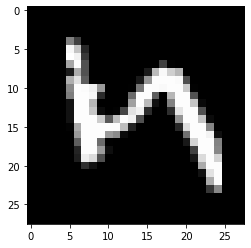

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
# takes the first item (image) of the first item of the dataset (image and label) 
img = train_ds_list[0][0]
# obtains image rotated and label (we don't use the label)
img, _ = random_90_rot(img,0)
img = np.array(img)
# the numpy has to be reshaped
img = img.reshape(28, 28)
plt.imshow(img, cmap='gray')

### Example 4. Image crop function

We also are going to use a crop function. It takes the image, width and height of the cropped frame.

This function will rescale the image with the tensorflow function *resize*.

In [ ]:
def resize_and_rescale(image, label):
    import numpy as np
    image = tf.image.resize(image, (28, 28))
    return image, label 

In [ ]:
def random_crop(image, label):
    import random
    import numpy as np
    # we obtain the random size of the new image
    size = random.randint(18,28)
    # we crop the size
    image = tf.image.resize_with_crop_or_pad(image, size, size)
    # we rescale the image
    image, label = resize_and_rescale(image, label)
    return image, label

We can test this two functions with this sample image.

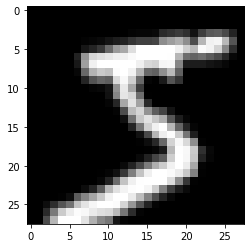

In [ ]:
import numpy as np
img = train_ds_list[0][0]
img, _ = random_crop(img, 0)
img = np.array(img)
img = img.reshape(28, 28)
plt.imshow(img, cmap='gray')

### Example 5. Apply data augmentation functions to dataset

To apply this image alteration functions we have to use the dataset *map* method. It is similar to the also called *map* python built-in function that iterates through a collection. This map functin allows a function that has to return two objects, the image and the label. This function doesn't need parameters when calling it because is inside the map method that already knows that the image and label will go to the functions called inside.  

The data augmentation won't be augmentation if it didn't have more data so we use the *repeat* method to append the hole dataset as many times as specified.

In [ ]:
import random
train_ds_aug = (train_ds
                    # repeats the hole block of images and labels
                    .repeat(2)
                    # because it both halves are equal we shuffle the hole dataset again
                    .shuffle(len(train_ds)*2)
                    # 90 degrees rotation for each element in the duplicated dataset
                    .map(random_90_rot, num_parallel_calls=tf.data.AUTOTUNE)
                    .map(random_crop, num_parallel_calls=tf.data.AUTOTUNE)
                    )

As you can see the data is duplicated.

In [ ]:
length_ds = len(train_ds)
length_ds_aug = len(train_ds_aug)
print('Normal length: ',length_ds, 'Augmented length: ', length_ds_aug)

Normal length:  60000 Augmented length:  120000


Just as before we can check the augmented dataset.

In [ ]:
train_ds_aug_list = list(train_ds_aug.as_numpy_iterator())

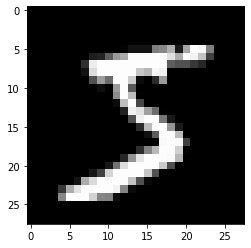

In [ ]:
img = train_ds_list[0][0].reshape(28, 28)
plt.imshow(img, cmap='gray')

### Example 6. Normalization

To apply the normalization is as easy as adding *BatchNormalization* layers.

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
# batch normalization
model.add(BatchNormalization())
# Tanh activation function
model.add(Conv2D(64, (3, 3), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

## 5.3. Final Exercise

### Exercise 1. Dataset type

Transform the data. X_train and X_val to type float32 and divide by 255.

In [ ]:
# Transform the train data


In [ ]:
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_val /= 255

Add the dimension color by reshaping to (size, 28, 28, 1) X_train and X_val.

In [ ]:
# reshape X_train and X_val


In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_val = X_val.reshape(10000, 28, 28, 1)

Convert the y data to catgeorical using the *keras.utils* *to_categorical* function

In [ ]:
# convert the y data to categorical


In [ ]:
num_category = 10
y_train = keras.utils.to_categorical(y_train, num_category)
y_val = keras.utils.to_categorical(y_val, num_category)

Convert the X_train, y_train, X_test and y_test into a Dataset object type. use the from_tensor_slices.

In [ ]:
# Initialize the train_ds and val_ds datasets

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))

### Exercise 2. Shuffle the data

We can use the method shuffle of the Dataset object. This method need a buffer_size parameter, which for a perfect shuffle it should be the size of the dataset.

You can see in this example how it works

In [ ]:
ds = tf.data.Dataset.range(10)
print(list(ds.as_numpy_iterator()))
ds = ds.shuffle(len(ds))
print(list(ds.as_numpy_iterator()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[9, 2, 8, 5, 3, 1, 4, 6, 0, 7]


Now we are going to shuffle our digits dataset.

In [ ]:
train_ds = train_ds.shuffle(buffer_size=len(train_ds))

### Exercise 3. Image rotation function

Use the random_90_rot function to rotate an image (it may not be rotated because of the random number generated). 
* First you have to convert the train_ds into a list to access individual values
* Obtain an image from the dataset list
* Use the random_90_rot function
* Convert it into a numpy array
* Reshape it into a (28,28)
* Use the *imshow* function with cmap='grey' to plot the image

In [ ]:
# plot an image with the convinient reshape


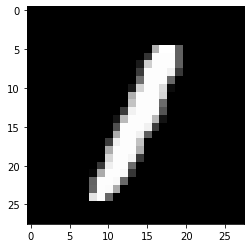

In [ ]:
train_ds_list = list(train_ds.as_numpy_iterator())
img = train_ds_list[0][0]
img, _ = random_90_rot(img,0)
img = np.array(img)
img = img.reshape(28, 28)
plt.imshow(img, cmap='gray')

### Exercise 4. Image crop function

Use the *random_crop* function to crop an image. 
* Obtain an image from the dataset list
* Use the random_crop function
* Convert it into a numpy array
* Reshape it into a (28,28)
* Use the *imshow* function with cmap='grey' to plot the image

In [ ]:
# plot a cropped image with the convinient reshape


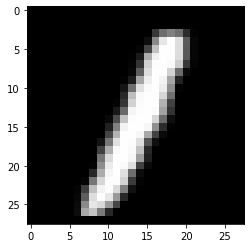

In [ ]:
import numpy as np
img = train_ds_list[0][0]
img, _ = random_crop(img, 0)
img = np.array(img)
img = img.reshape(28, 28)
plt.imshow(img, cmap='gray')

### Exercise 5. Apply data augmentation functions to dataset

Apply these function to the train dataset with the data repeated and shuffled.

In [ ]:
# Apply the data augmentation to the train dataset


In [ ]:
train_ds_aug = (train_ds
                    .repeat(2)
                    .shuffle(len(train_ds)*2)
                    .map(random_90_rot, num_parallel_calls=tf.data.AUTOTUNE)
                    .map(random_crop, num_parallel_calls=tf.data.AUTOTUNE)
                    )

### Exercise 6. Normalization

Add a BatchNormalization layer in the correct position in this model and change the activation function to tanh.

In [ ]:
# Add a BatchNormalization layer in the correct position in this model 
# and change the activation function to tanh.
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))